Original code by **Raghavender Ganesh**.   
Updated with better documentation and code readability.

### 5 - NLP for patients insights from a medical texts

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import nltk 
import re
import spacy
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize

from transformers import pipeline
from wordcloud import WordCloud

In [ ]:
stop_words=set(stopwords.words('english'))

In [ ]:
texts = [
    "Patient has a history of hypertension and diabetes . Prescribed medication X .",
    "Asthma diagnosis confirmed . Patient advised to use inhaler daily .",
    "Hypertension patient . Needs regular monitoring of blood pressure .",
    "Diabetes patient . Recommended diet and exercise .",
    "Patient diagnosed with hypertension . Medication Y prescribed ."
]

#### Dataframe

In [12]:
df = pd.DataFrame({"Medical_Texts": texts})
df.head()

,Medical_Texts
0,Patient has a history of hypertension and diab...
1,Asthma diagnosis confirmed . Patient advised t...
2,Hypertension patient . Needs regular monitorin...
3,Diabetes patient . Recommended diet and exerci...
4,Patient diagnosed with hypertension . Medicati...


#### Pre-processing

In [ ]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r"\d+", " ", text)
    text = re.sub(r"\W+", " ", text)
    text_list = [words for words in text.split() 
                 if words not in stopwords.words("english") 
                 and words not in string.punctuation]
    return " ".join(text_list)

In [17]:
df['Medical_Texts'] = df['Medical_Texts'].apply(preprocess)
df.head()

,Medical_Texts
0,patient history hypertension diabetes prescrib...
1,asthma diagnosis confirmed patient advised use...
2,hypertension patient needs regular monitoring ...
3,diabetes patient recommended diet exercise
4,patient diagnosed hypertension medication pres...


### Named Entity Recognition (NER)

In [ ]:
NER = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = NER(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities if entities else []

df['Named_Entities'] = df['Medical_Texts'].apply(extract_entities)
df.head()

,Medical_Texts,NER
0,patient history hypertension diabetes prescrib...,None
1,asthma diagnosis confirmed patient advised use...,"[daily, DATE]"
2,hypertension patient needs regular monitoring ...,None
3,diabetes patient recommended diet exercise,None
4,patient diagnosed hypertension medication pres...,None


### Sentiment Analysis

In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
def sentiment(x):
    return sentiment_pipeline(x)[0]
df['Sentiment'] = df['Medical_Texts'].apply(sentiment)

df['Sentiment'].head()

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


0    {'label': 'NEGATIVE', 'score': 0.9549494981765...
1    {'label': 'NEGATIVE', 'score': 0.866174578666687}
2    {'label': 'NEGATIVE', 'score': 0.9863327145576...
3    {'label': 'POSITIVE', 'score': 0.646909236907959}
4    {'label': 'NEGATIVE', 'score': 0.9696681499481...
Name: Sentiment, dtype: object

### WordCloud

(-0.5, 799.5, 399.5, -0.5)

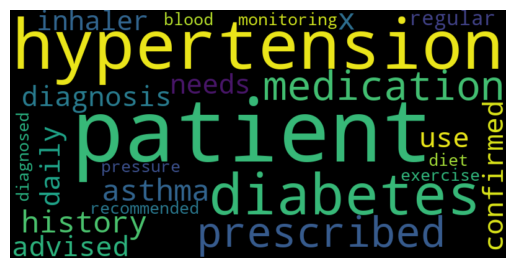

In [ ]:
all_texts = " ".join(df['Medical_Texts'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_texts)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

---